In [2]:
%load_ext autoreload
%autoreload 2

from https://www.microscopyu.com/microscopy-basics/properties-of-microscope-objectives 

100x oil: NA = 1.4 

60x air: NA = 0.95 

40x air: NA = 0.95 

20x air: NA = 0.75 

10x air: NA = 0.45 

4x air: NA = 0.2 

2x air: NA = 0.1 

In [3]:
# import sys
# sys.path.insert(1, '/home/georgeos/Documents/GitHub/SyMBac/') # Not needed if you installed SyMBac using pip

from SyMBac.simulation import Simulation
from SyMBac.PSF import PSF_generator
from SyMBac.renderer import Renderer
from SyMBac.PSF import Camera
from SyMBac.misc import get_sample_images
real_image = get_sample_images()["E. coli 100x fluorescence"]

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

c:\Users\robho\OneDrive\Desktop\Uni_Work\Year_4\project2\SyMBac\cell_simulation.py:10: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
for image in get_sample_images():
    print(get_sample_images()[image].shape)
    print(image)

(256, 46)
E. coli 100x
(256, 46)
E. coli 100x stationary
(256, 32)
E. coli DeLTA
(256, 46)
E. coli 100x fluorescence


# 100x

In [5]:
my_simulation = Simulation(
    trench_length=15,
    trench_width=1.3,
    cell_max_length=6, #6, long cells # 1.65 short cells
    cell_width= 1, #1 long cells # 0.95 short cells
    sim_length = 100,
    pix_mic_conv = 0.065,
    gravity=0,
    phys_iters=15,
    max_length_var = 0.01,
    width_var = 0.01,
    lysis_p = 0.,
    save_dir="C:\\Users\\robho\\OneDrive\\Desktop\\Uni_Work\\Year_4\\project2",
    resize_amount = 3
)

In [6]:
my_simulation.run_simulation(show_window=False)

  0%|          | 0/100 [00:00<?, ?it/s]

In [7]:
my_simulation.draw_simulation_OPL(do_transformation=True, label_masks=True)

Timeseries Properties:   0%|          | 0/98 [00:00<?, ?it/s]

Scene Draw::   0%|          | 0/98 [00:00<?, ?it/s]

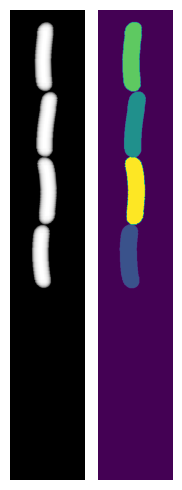

In [8]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2,5))
ax1.imshow(my_simulation.OPL_scenes[-1], cmap="Greys_r")
ax1.axis("off")
ax2.imshow(my_simulation.masks[-1])
ax2.axis("off")
plt.tight_layout()

HhahahahahhahahahAAAHAHAHAHH


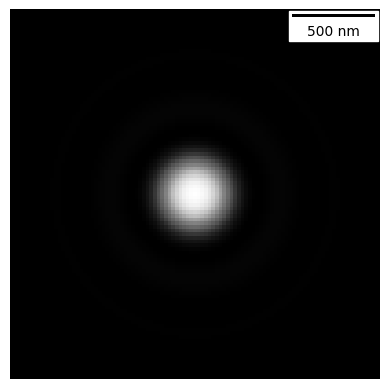

In [9]:
# A 2D simple fluorescence kernel based on Airy
my_kernel = PSF_generator(
    radius = 50,
    wavelength = 0.6,
    NA = 1.45,
    n = 1.5,
    resize_amount = 3,
    pix_mic_conv = 0.0655,
    apo_sigma = None,
    mode="simple fluo",
    condenser = "PhF")
my_kernel.calculate_PSF()
my_kernel.plot_PSF()

In [10]:
my_renderer = Renderer(simulation = my_simulation, PSF = my_kernel, real_image = real_image)

AYOOOOOOOOOOOOO
(256, 46)
(468, 67)


In [11]:
ml = np.array(pd.read_csv("csv_files/media_fluo.csv"))
cl = np.array(pd.read_csv("csv_files/cell_fluo.csv"))
dl = np.array(pd.read_csv("csv_files/device_fluo.csv"))

In [12]:
np.max(real_image)

65535

In [13]:
my_renderer.select_intensity_napari(ml,cl,dl)

In [119]:
# pd.DataFrame(my_renderer.media_label.data).to_csv("csv_files/media_fluo.csv",header=None,index=False)
# pd.DataFrame(my_renderer.cell_label.data).to_csv("csv_files/cell_fluo.csv",header=None,index=False)
# pd.DataFrame(my_renderer.device_label.data).to_csv("csv_files/device_fluo.csv",header=None,index=False)

In [14]:
my_renderer.optimise_synth_image(manual_update=False)

interactive(children=(IntSlider(value=88, description='media_multiplier', max=300, min=-300), FloatSlider(valu…

In [ ]:
my_renderer.generate_training_data(sample_amount=0.1, randomise_hist_match=False, randomise_noise_match=False, burn_in=40, n_samples = 800, save_dir="fluo/100x test", in_series=False)

# 60x

In [17]:
my_simulation = Simulation(
    trench_length=15*1.67,
    trench_width=1.3,
    cell_max_length=6, #6, long cells # 1.65 short cells
    cell_width= 1, #1 long cells # 0.95 short cells
    sim_length = 100,
    pix_mic_conv = 0.1,
    gravity=0,
    phys_iters=15,
    max_length_var = 0.01,
    width_var = 0.01,
    lysis_p = 0.,
    save_dir="C:\\Users\\robho\\OneDrive\\Desktop\\Uni_Work\\Year_4\\project2",
    resize_amount = 3
)

In [18]:
my_simulation.run_simulation(show_window=False)

  0%|          | 0/100 [00:00<?, ?it/s]

In [19]:
my_simulation.draw_simulation_OPL(do_transformation=True, label_masks=True)

Timeseries Properties:   0%|          | 0/98 [00:00<?, ?it/s]

Scene Draw::   0%|          | 0/98 [00:00<?, ?it/s]

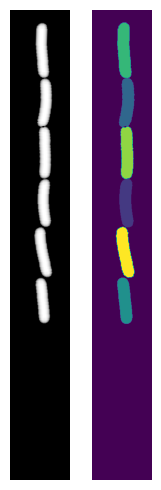

In [20]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2,5))
ax1.imshow(my_simulation.OPL_scenes[-1], cmap="Greys_r")
ax1.axis("off")
ax2.imshow(my_simulation.masks[-1])
ax2.axis("off")
plt.tight_layout()

HhahahahahhahahahAAAHAHAHAHH


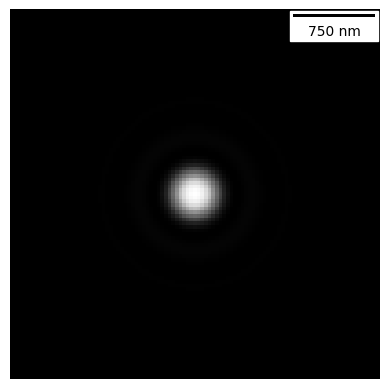

In [21]:
# A 2D simple fluorescence kernel based on Airy
my_kernel = PSF_generator(
    radius = 50,
    wavelength = 0.6,
    NA = 0.95,
    n = 1,
    resize_amount = 3,
    pix_mic_conv = 0.1,
    apo_sigma = None,
    mode="simple fluo",
    condenser = "PhF")
my_kernel.calculate_PSF()
my_kernel.plot_PSF()

In [22]:
my_renderer = Renderer(simulation = my_simulation, PSF = my_kernel, real_image = real_image)

AYOOOOOOOOOOOOO
(256, 46)
(507, 53)


In [23]:
my_renderer.select_intensity_napari(ml,cl,dl)

In [24]:
my_renderer.optimise_synth_image(manual_update=False)

interactive(children=(IntSlider(value=88, description='media_multiplier', max=300, min=-300), FloatSlider(valu…

In [ ]:
my_renderer.generate_training_data(sample_amount=0.1, randomise_hist_match=False, randomise_noise_match=False, burn_in=40, n_samples = 500, save_dir="fluo/60x test", in_series=False)

# 40x

In [26]:
real_image40 = np.zeros(np.array(real_image.shape)//2)
a,b = real_image40.shape
for i in range(a):
    for j in range(b):
        real_image40[i,j] = real_image[2*i,2*j]

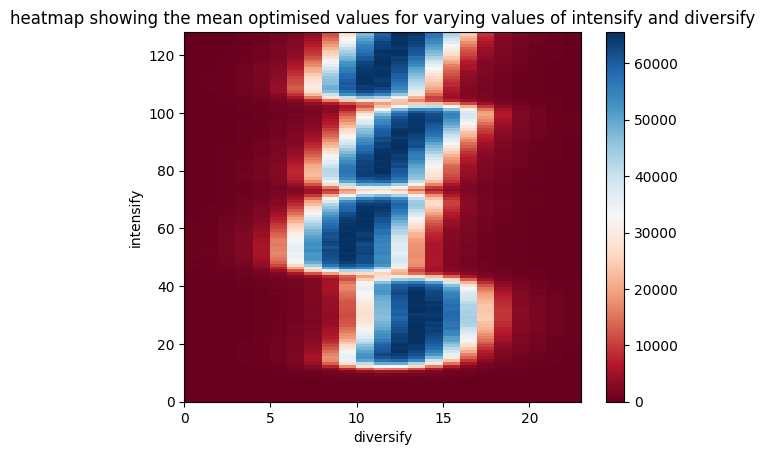

In [27]:
plt.pcolor(real_image40, cmap='RdBu')
plt.title(r"heatmap showing the mean optimised values for varying values of intensify and diversify")
plt.xlabel(r'diversify')
plt.ylabel(r'intensify')
plt.colorbar()
plt.show()

In [29]:
my_simulation = Simulation(
    trench_length=15,
    trench_width=1.3,
    cell_max_length=6, #6, long cells # 1.65 short cells
    cell_width= 1, #1 long cells # 0.95 short cells
    sim_length = 100,
    pix_mic_conv = 0.16,
    gravity=0,
    phys_iters=15,
    max_length_var = 0.01,
    width_var = 0.01,
    lysis_p = 0.,
    save_dir="C:\\Users\\robho\\OneDrive\\Desktop\\Uni_Work\\Year_4\\project2",
    resize_amount = 3
)

In [30]:
my_simulation.run_simulation(show_window=False)

  0%|          | 0/100 [00:00<?, ?it/s]

In [31]:
my_simulation.draw_simulation_OPL(do_transformation=True, label_masks=True)

Timeseries Properties:   0%|          | 0/98 [00:00<?, ?it/s]

Scene Draw::   0%|          | 0/98 [00:00<?, ?it/s]

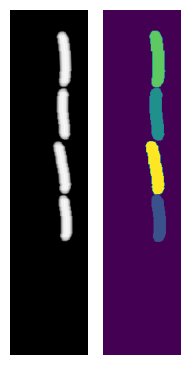

In [32]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2,5))
ax1.imshow(my_simulation.OPL_scenes[-1], cmap="Greys_r")
ax1.axis("off")
ax2.imshow(my_simulation.masks[-1])
ax2.axis("off")
plt.tight_layout()

HhahahahahhahahahAAAHAHAHAHH


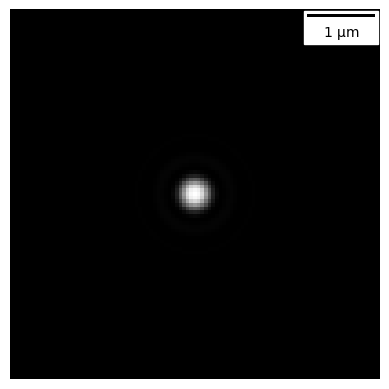

In [33]:
# A 2D simple fluorescence kernel based on Airy
my_kernel = PSF_generator(
    radius = 50,
    wavelength = 0.6,
    NA = 0.95,
    n = 1,
    resize_amount = 3,
    pix_mic_conv = 0.16,
    apo_sigma = None,
    mode="simple fluo",
    condenser = "PhF")
my_kernel.calculate_PSF()
my_kernel.plot_PSF()

In [34]:
my_renderer = Renderer(simulation = my_simulation, PSF = my_kernel, real_image = real_image40)

AYOOOOOOOOOOOOO
(128, 23)
(194, 43)


In [35]:
my_renderer.select_intensity_napari()

In [37]:
my_renderer.optimise_synth_image(manual_update=False)

interactive(children=(IntSlider(value=88, description='media_multiplier', max=300, min=-300), FloatSlider(valu…

In [ ]:
my_renderer.generate_training_data(sample_amount=0.1, randomise_hist_match=False, randomise_noise_match=False, burn_in=40, n_samples = 400, save_dir="fluo/40x test", in_series=False)

# 35x

In [22]:
real_image35 = np.zeros((np.array(real_image.shape)//[256/172,46/39]).astype(int))
a,b = real_image35.shape
for i in range(a):
    for j in range(b):
        real_image35[i,j] = real_image[int(256/172*i),int(46/39*j)]

In [6]:
plt.pcolor(real_image35, cmap='RdBu')
plt.title(r"heatmap showing the mean optimised values for varying values of intensify and diversify")
plt.xlabel(r'diversify')
plt.ylabel(r'intensify')
plt.colorbar()
plt.show()

NameError: name 'plt' is not defined

In [7]:
my_simulation = Simulation(
    trench_length=15,
    trench_width=1.3,
    cell_max_length=6, #6, long cells # 1.65 short cells
    cell_width= 1, #1 long cells # 0.95 short cells
    sim_length = 100,
    pix_mic_conv = 0.18,
    gravity=0,
    phys_iters=15,
    max_length_var = 0.01,
    width_var = 0.01,
    lysis_p = 0.,
    save_dir="C:\\Users\\robho\\OneDrive\\Desktop\\Uni_Work\\Year_4\\project2",
    resize_amount = 3
)

In [8]:
my_simulation.run_simulation(show_window=False)

  0%|          | 0/100 [00:00<?, ?it/s]

In [9]:
my_simulation.draw_simulation_OPL(do_transformation=True, label_masks=True)

Timeseries Properties:   0%|          | 0/98 [00:00<?, ?it/s]

Scene Draw::   0%|          | 0/98 [00:00<?, ?it/s]

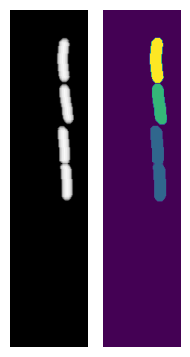

In [10]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2,5))
ax1.imshow(my_simulation.OPL_scenes[-1], cmap="Greys_r")
ax1.axis("off")
ax2.imshow(my_simulation.masks[-1])
ax2.axis("off")
plt.tight_layout()

HhahahahahhahahahAAAHAHAHAHH


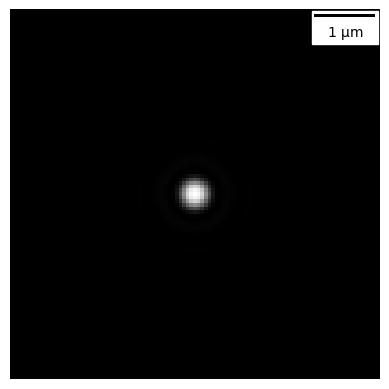

In [11]:
# A 2D simple fluorescence kernel based on Airy
my_kernel = PSF_generator(
    radius = 50,
    wavelength = 0.6,
    NA = 0.9,
    n = 1,
    resize_amount = 3,
    pix_mic_conv = 0.18,
    apo_sigma = None,
    mode="simple fluo",
    condenser = "PhF")
my_kernel.calculate_PSF()
my_kernel.plot_PSF()

In [23]:
my_renderer = Renderer(simulation = my_simulation, PSF = my_kernel, real_image = real_image35)

AYOOOOOOOOOOOOO
(172, 38)
(173, 40)


In [24]:
my_renderer.select_intensity_napari()

In [25]:
my_renderer.optimise_synth_image(manual_update=False)

interactive(children=(IntSlider(value=88, description='media_multiplier', max=300, min=-300), FloatSlider(valu…

In [ ]:
my_renderer.generate_training_data(sample_amount=0.1, randomise_hist_match=False, randomise_noise_match=False, burn_in=40, n_samples = 500, save_dir="fluo/35x test", in_series=False)

# 30x

In [5]:
real_image30 = np.zeros((np.array(real_image.shape)//[256/147,46/36]).astype(int))
a,b = real_image30.shape
for i in range(a):
    for j in range(b):
        real_image30[i,j] = real_image[int(256/147*i),int(46/36*j)]

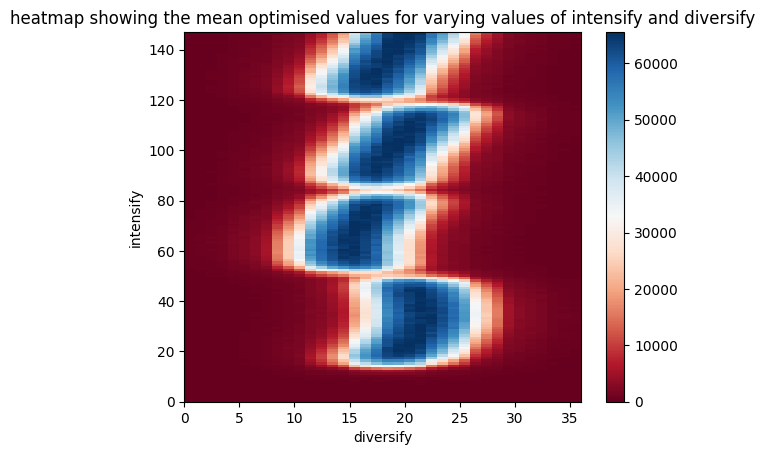

In [6]:
plt.pcolor(real_image30, cmap='RdBu')
plt.title(r"heatmap showing the mean optimised values for varying values of intensify and diversify")
plt.xlabel(r'diversify')
plt.ylabel(r'intensify')
plt.colorbar()
plt.show()

In [7]:
my_simulation = Simulation(
    trench_length=15,
    trench_width=1.3,
    cell_max_length=6, #6, long cells # 1.65 short cells
    cell_width= 1, #1 long cells # 0.95 short cells
    sim_length = 100,
    pix_mic_conv = 0.21,
    gravity=0,
    phys_iters=15,
    max_length_var = 0.01,
    width_var = 0.01,
    lysis_p = 0.,
    save_dir="C:\\Users\\robho\\OneDrive\\Desktop\\Uni_Work\\Year_4\\project2",
    resize_amount = 3
)

In [8]:
my_simulation.run_simulation(show_window=False)

  0%|          | 0/100 [00:00<?, ?it/s]

In [9]:
my_simulation.draw_simulation_OPL(do_transformation=True, label_masks=True)

Timeseries Properties:   0%|          | 0/98 [00:00<?, ?it/s]

Scene Draw::   0%|          | 0/98 [00:00<?, ?it/s]

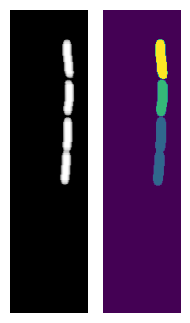

In [10]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2,5))
ax1.imshow(my_simulation.OPL_scenes[-1], cmap="Greys_r")
ax1.axis("off")
ax2.imshow(my_simulation.masks[-1])
ax2.axis("off")
plt.tight_layout()

HhahahahahhahahahAAAHAHAHAHH


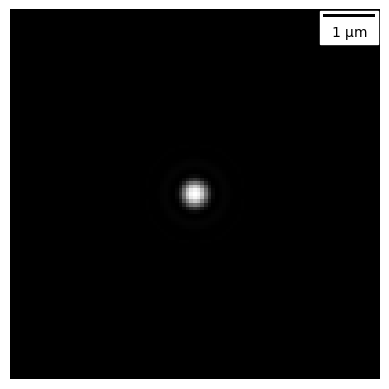

In [11]:
# A 2D simple fluorescence kernel based on Airy
my_kernel = PSF_generator(
    radius = 50,
    wavelength = 0.6,
    NA = 0.85,
    n = 1,
    resize_amount = 3,
    pix_mic_conv = 0.21,
    apo_sigma = None,
    mode="simple fluo",
    condenser = "PhF")
my_kernel.calculate_PSF()
my_kernel.plot_PSF()

In [12]:
my_renderer = Renderer(simulation = my_simulation, PSF = my_kernel, real_image = real_image30)

AYOOOOOOOOOOOOO
(147, 36)
(149, 37)


In [13]:
my_renderer.select_intensity_napari()

In [14]:
my_renderer.optimise_synth_image(manual_update=False)

interactive(children=(IntSlider(value=88, description='media_multiplier', max=300, min=-300), FloatSlider(valu…

In [ ]:
my_renderer.generate_training_data(sample_amount=0.1, randomise_hist_match=False, randomise_noise_match=False, burn_in=40, n_samples = 400, save_dir="fluo/30x test", in_series=False)

# 25x

In [33]:
real_image25 = np.zeros((np.array(real_image.shape)//[256/122,46/27]).astype(int))
a,b = real_image25.shape
for i in range(a):
    for j in range(b):
        real_image25[i,j] = real_image[int(256/122*i),int(46/27*j)]

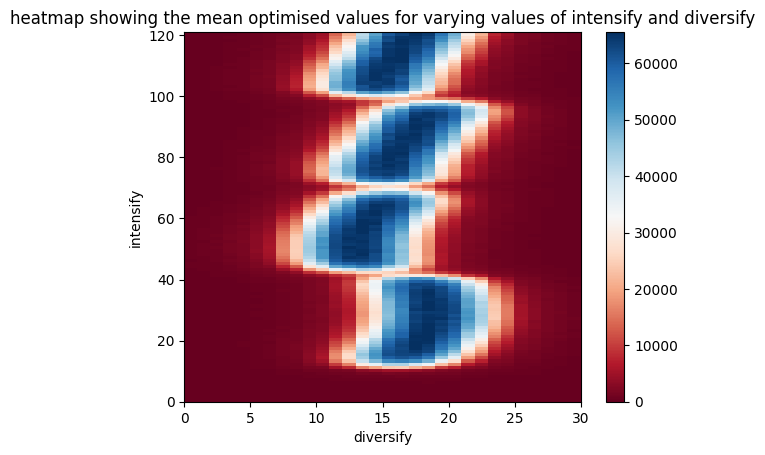

In [17]:
plt.pcolor(real_image25, cmap='RdBu')
plt.title(r"heatmap showing the mean optimised values for varying values of intensify and diversify")
plt.xlabel(r'diversify')
plt.ylabel(r'intensify')
plt.colorbar()
plt.show()

In [19]:
my_simulation = Simulation(
    trench_length=15,
    trench_width=1.3,
    cell_max_length=6, #6, long cells # 1.65 short cells
    cell_width= 1, #1 long cells # 0.95 short cells
    sim_length = 100,
    pix_mic_conv = 0.26,
    gravity=0,
    phys_iters=15,
    max_length_var = 0.01,
    width_var = 0.01,
    lysis_p = 0.,
    save_dir="C:\\Users\\robho\\OneDrive\\Desktop\\Uni_Work\\Year_4\\project2",
    resize_amount = 3
)

In [20]:
my_simulation.run_simulation(show_window=False)

  0%|          | 0/100 [00:00<?, ?it/s]

In [21]:
my_simulation.draw_simulation_OPL(do_transformation=True, label_masks=True)

Timeseries Properties:   0%|          | 0/98 [00:00<?, ?it/s]

Scene Draw::   0%|          | 0/98 [00:00<?, ?it/s]

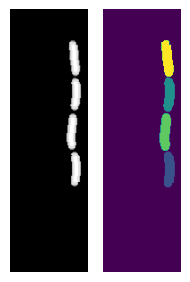

In [22]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2,5))
ax1.imshow(my_simulation.OPL_scenes[-1], cmap="Greys_r")
ax1.axis("off")
ax2.imshow(my_simulation.masks[-1])
ax2.axis("off")
plt.tight_layout()

HhahahahahhahahahAAAHAHAHAHH


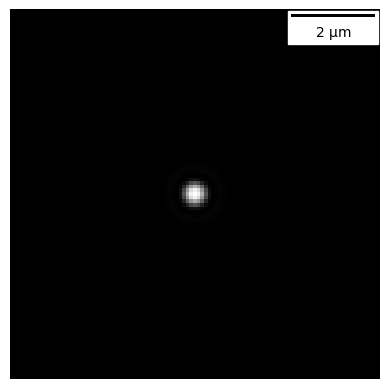

In [23]:
# A 2D simple fluorescence kernel based on Airy
my_kernel = PSF_generator(
    radius = 50,
    wavelength = 0.6,
    NA = 0.8,
    n = 1,
    resize_amount = 3,
    pix_mic_conv = 0.26,
    apo_sigma = None,
    mode="simple fluo",
    condenser = "PhF")
my_kernel.calculate_PSF()
my_kernel.plot_PSF()

In [34]:
my_renderer = Renderer(simulation = my_simulation, PSF = my_kernel, real_image = real_image25)

AYOOOOOOOOOOOOO
(121, 26)
(122, 28)


In [35]:
my_renderer.select_intensity_napari()

In [36]:
my_renderer.optimise_synth_image(manual_update=False)

interactive(children=(IntSlider(value=88, description='media_multiplier', max=300, min=-300), FloatSlider(valu…

In [ ]:
my_renderer.generate_training_data(sample_amount=0.1, randomise_hist_match=False, randomise_noise_match=False, burn_in=40, n_samples = 400, save_dir="fluo/25x test", in_series=False)

# 20x

In [4]:
real_image20 = np.zeros((np.array(real_image.shape)//[256/100,46/30]).astype(int))
a,b = real_image20.shape
for i in range(a):
    for j in range(b):
        real_image20[i,j] = real_image[int(2.56*i),int(46/30*j)]

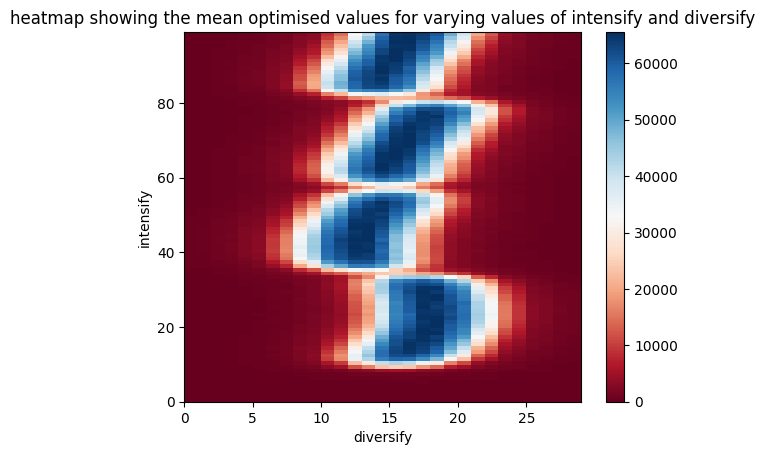

In [5]:
plt.pcolor(real_image20, cmap='RdBu')
plt.title(r"heatmap showing the mean optimised values for varying values of intensify and diversify")
plt.xlabel(r'diversify')
plt.ylabel(r'intensify')
plt.colorbar()
plt.show()

In [6]:
my_simulation = Simulation(
    trench_length=15,
    trench_width=1.3,
    cell_max_length=6, #6, long cells # 1.65 short cells
    cell_width= 1, #1 long cells # 0.95 short cells
    sim_length = 100,
    pix_mic_conv = 0.32,
    gravity=0,
    phys_iters=15,
    max_length_var = 0.01,
    width_var = 0.01,
    lysis_p = 0.,
    save_dir="C:\\Users\\robho\\OneDrive\\Desktop\\Uni_Work\\Year_4\\project2",
    resize_amount = 3
)

In [7]:
my_simulation.run_simulation(show_window=False)

  0%|          | 0/100 [00:00<?, ?it/s]

In [8]:
my_simulation.draw_simulation_OPL(do_transformation=True, label_masks=True)

Timeseries Properties:   0%|          | 0/98 [00:00<?, ?it/s]

Scene Draw::   0%|          | 0/98 [00:00<?, ?it/s]

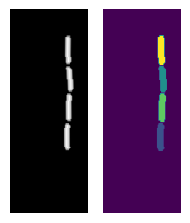

In [9]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2,5))
ax1.imshow(my_simulation.OPL_scenes[-1], cmap="Greys_r")
ax1.axis("off")
ax2.imshow(my_simulation.masks[-1])
ax2.axis("off")
plt.tight_layout()

HhahahahahhahahahAAAHAHAHAHH


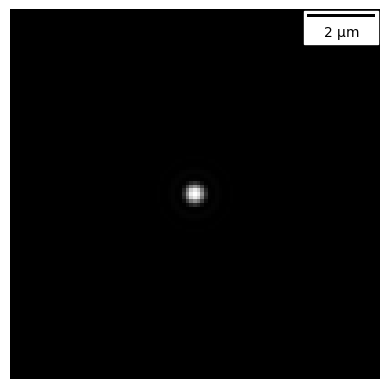

In [10]:
# A 2D simple fluorescence kernel based on Airy
my_kernel = PSF_generator(
    radius = 50,
    wavelength = 0.6,
    NA = 0.75,
    n = 1,
    resize_amount = 3,
    pix_mic_conv = 0.32,
    apo_sigma = None,
    mode="simple fluo",
    condenser = "PhF")
my_kernel.calculate_PSF()
my_kernel.plot_PSF()

In [11]:
my_renderer = Renderer(simulation = my_simulation, PSF = my_kernel, real_image = real_image20)

AYOOOOOOOOOOOOO
(99, 29)
(100, 33)


In [12]:
my_renderer.select_intensity_napari()

In [13]:
my_renderer.optimise_synth_image(manual_update=False)

interactive(children=(IntSlider(value=88, description='media_multiplier', max=300, min=-300), FloatSlider(valu…

In [ ]:
my_renderer.generate_training_data(sample_amount=0.1, randomise_hist_match=False, randomise_noise_match=False, burn_in=40, n_samples = 400, save_dir="fluo/20x test", in_series=False)

# 10x

In [ ]:
real_image20 = np.zeros((np.array(real_image.shape)//[256/100,46/30]).astype(int))
a,b = real_image20.shape
for i in range(a):
    for j in range(b):
        real_image20[i,j] = real_image[int(2.56*i),int(46/30*j)]

In [ ]:
plt.pcolor(real_image20, cmap='RdBu')
plt.title(r"heatmap showing the mean optimised values for varying values of intensify and diversify")
plt.xlabel(r'diversify')
plt.ylabel(r'intensify')
plt.colorbar()
plt.show()

In [63]:
my_simulation = Simulation(
    trench_length=15,
    trench_width=1.3,
    cell_max_length=6, #6, long cells # 1.65 short cells
    cell_width= 1, #1 long cells # 0.95 short cells
    sim_length = 100,
    pix_mic_conv = 0.65,
    gravity=0,
    phys_iters=15,
    max_length_var = 0.01,
    width_var = 0.01,
    lysis_p = 0.,
    save_dir="C:\\Users\\robho\\OneDrive\\Desktop\\Uni_Work\\Year_4\\Project",
    resize_amount = 3
)

In [64]:
my_simulation.run_simulation(show_window=False)

  0%|          | 0/100 [00:00<?, ?it/s]

In [65]:
my_simulation.draw_simulation_OPL(do_transformation=True, label_masks=True)

Timeseries Properties:   0%|          | 0/98 [00:00<?, ?it/s]

Scene Draw::   0%|          | 0/98 [00:00<?, ?it/s]

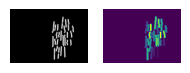

In [66]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2,5))
ax1.imshow(my_simulation.OPL_scenes[-1], cmap="Greys_r")
ax1.axis("off")
ax2.imshow(my_simulation.masks[-1])
ax2.axis("off")
plt.tight_layout()